In [ ]:
import os
import numpy as np
import pywt
from tqdm import tqdm
import pywt
import matplotlib.pyplot as plt
from google.colab import drive
# drive.mount('/content/drive')
# dataset address
# https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def load_y_data(y_path):
    y = np.loadtxt(y_path, dtype=np.int32).reshape(-1,1)
    # change labels range from 1-6 t 0-5, this enables a sparse_categorical_crossentropy loss function
    return y - 1

def load_X_data(X_path):
    X_signal_paths = [X_path + file for file in os.listdir(X_path)]
    X_signals = [np.loadtxt(path, dtype=np.float32) for path in X_signal_paths]
    return np.transpose(np.array(X_signals), (1, 2, 0))

dir = "/content/drive/MyDrive/data/HAR/"
label_names = ["body acc x", "body acc y", "body acc z", 
               "body gyros x", "body gyros y", "body gyros z",
               "total acc x", "total acc y", "total acc z"]

# load X data
X_train = load_X_data(dir + 'train/Inertial Signals/')
X_test = load_X_data(dir + 'test/Inertial Signals/')
# load y label
y_train = load_y_data(dir + 'train/y_train.txt')
y_test = load_y_data(dir + 'test/y_test.txt')

In [ ]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(7352, 128, 9) (2947, 128, 9)
(7352, 1) (2947, 1)


[2]


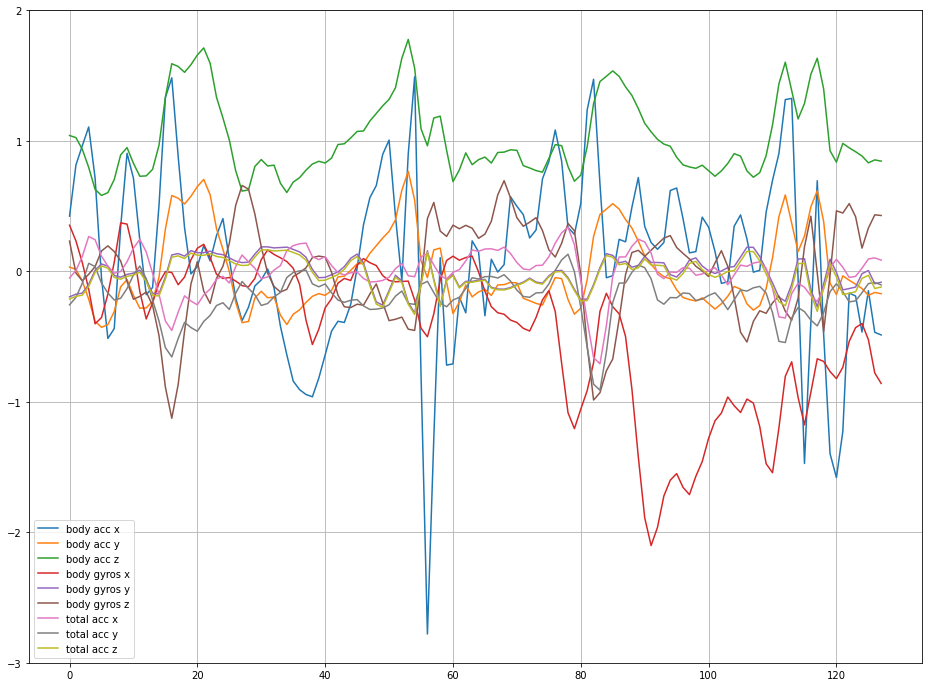

In [ ]:
example_sig = X_train[127]
print(y_train[127])
plt.figure(figsize=(16, 12))
for i in range(9):
    plt.plot(example_sig[:, i], label=label_names[i])
plt.legend()
plt.ylim((-3, 2))
plt.grid()
plt.show()

In [ ]:
def split_indices_per_label(y):
    indicies_per_label = [[] for x in range(0,6)]
    # loop over the six labels
    for i in range(6): 
        indicies_per_label[i] = np.where(y == i)[0]
    return indicies_per_label

def plot_cwt_coeffs_per_label(X, label_indicies, label_names, signal, sample, scales, wavelet): 
    fig, axs = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(12,5)) 
    for ax, indices, name in zip(axs.flat, label_indicies, label_names):
        # apply  PyWavelets continuous wavelet transfromation function
        coeffs, freqs = pywt.cwt(X[indices[sample],:, signal], scales, wavelet = wavelet)
        # create scalogram
        ax.imshow(coeffs, cmap = 'coolwarm', aspect = 'auto')
        ax.set_title(name)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.set_ylabel('Scale')
        ax.set_xlabel('Time')
    plt.tight_layout()

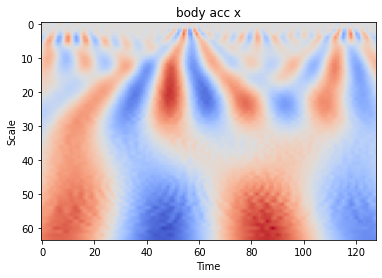

In [ ]:
coeffs0, freqs0 = pywt.cwt(example_sig[:, 0], np.arange(1, 65), wavelet='morl')
plt.imshow(coeffs0, cmap = 'coolwarm', aspect = 'auto')
plt.title("body acc x")
plt.ylabel('Scale')
plt.xlabel('Time')
plt.show()

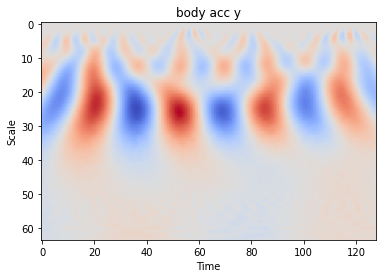

In [ ]:
coeffs1, freqs1 = pywt.cwt(example_sig[:, 1], np.arange(1, 65), wavelet='morl')
plt.imshow(coeffs1, cmap = 'coolwarm', aspect = 'auto')
plt.title("body acc y")
plt.ylabel('Scale')
plt.xlabel('Time')
plt.show()

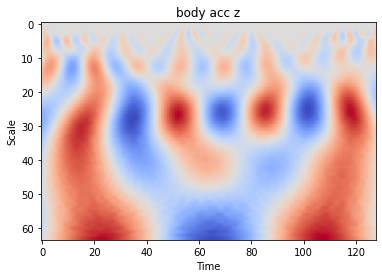

In [ ]:
coeffs2, freqs2 = pywt.cwt(example_sig[:, 2], np.arange(1, 65), wavelet='morl')
plt.imshow(coeffs2, cmap = 'coolwarm', aspect = 'auto')
plt.title("body acc z")
plt.ylabel('Scale')
plt.xlabel('Time')
plt.show()

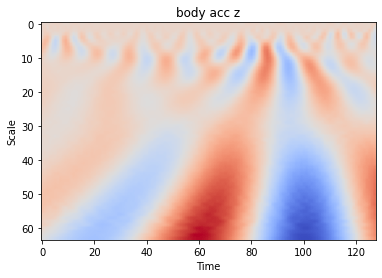

In [ ]:
coeffs3, freqs3 = pywt.cwt(example_sig[:, 3], np.arange(1, 65), wavelet='morl')
plt.imshow(coeffs3, cmap = 'coolwarm', aspect = 'auto')
plt.title("body acc z")
plt.ylabel('Scale')
plt.xlabel('Time')
plt.show()